In [1]:
from radd import build, models, fit, vis
from radd.toolbox import theta

In [2]:
d = 'FinalRe/v'
if not os.path.isdir(pth+d):
      os.mkdir(pth+d)
os.chdir(pth+d)
m = build.Model(data=redata, kind='xradd', dynamic='hyp', tb=.650, depends_on={'v':'Cond'})
m.optimize(tol=1.e-5, multiopt=True, maxfev=5000, ntrials=10000)

basinhopping step 0: f 0.0078594
basinhopping step 1: f 0.0078594 trial_f 0.198091 accepted 0  lowest_f 0.0078594
basinhopping step 2: f 0.00355325 trial_f 0.00355325 accepted 1  lowest_f 0.00355325
found new global minimum on step 2 with function value 0.00355325
basinhopping step 3: f 0.0247769 trial_f 0.0247769 accepted 1  lowest_f 0.00355325
basinhopping step 4: f 0.108043 trial_f 0.108043 accepted 1  lowest_f 0.00355325
basinhopping step 5: f 0.026234 trial_f 0.026234 accepted 1  lowest_f 0.00355325
basinhopping step 6: f 0.494998 trial_f 0.494998 accepted 1  lowest_f 0.00355325
basinhopping step 7: f 0.494998 trial_f 1.5407 accepted 0  lowest_f 0.00355325
basinhopping step 8: f 0.459158 trial_f 0.459158 accepted 1  lowest_f 0.00355325
basinhopping step 9: f 0.19383 trial_f 0.19383 accepted 1  lowest_f 0.00355325
adaptive stepsize: acceptance rate 0.700000 target 0.500000 new stepsize 0.0555556 old stepsize 0.05
basinhopping step 10: f 0.19383 trial_f 1.09725 accepted 0  lowest_f 

In [67]:
from radd.toolbox import analyze
fitsc, fitgq, fiteq = vis.unpack_yvector(m.fits[:16])
fit_cq, fit_eq = [analyze.kde_fit_quantiles(q, bw=.01) for q in [fitgq, fiteq]]
#sns.jointplot(x, y=)
sc, gq, eq = vis.unpack_yvector(m.avg_y[0])
cq, eq = [analyze.kde_fit_quantiles(q, bw=.01) for q in [gq, eq]]

In [ ]:
vis.plot_fits(m.avg_y[0], m.fits[:16], kind='radd', colors=["#16a085"]*2, data=redata.query('Cond=="bsl"'))
plt.savefig('rebsl_drift_fits.png', dpi=500)
plt.savefig('rebsl_drift_fits.svg', rasterized=True)
vis.plot_fits(m.avg_y[1], m.fits[16:], kind='radd', colors=["#16a085"]*2, data=redata.query('Cond=="pnl"'))
plt.savefig('repnl_drift_fits.png', dpi=500)
plt.savefig('repnl_drift_fits.svg', rasterized=True)

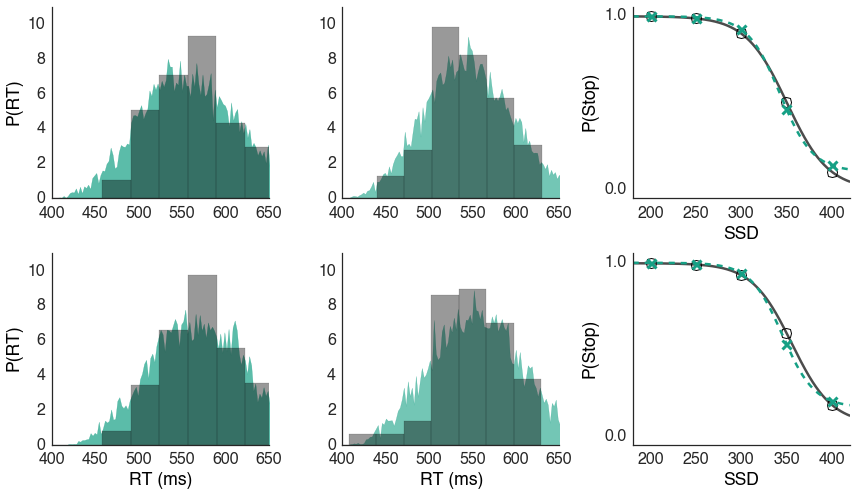

In [14]:
f, axes = plt.subplots(2,3,figsize=(12, 7))
sns.set_context('notebook', font_scale=1.6)
fits=m.fits.reshape(2,16)
y=m.avg_y
labels=['Baseline', 'Caution']
datas=[redata.query('Cond=="bsl"'), redata.query('Cond=="pnl"')]

for ax in axes.flatten():
      if ax.is_last_col():
            continue
      ax.set_ylim(0,11)

for i in range(m.ncond):
      vis.plot_fits(y[i], fits[i], kind='radd', colors=["#16a085"]*2, data=datas[i], axes=axes[i])

plt.savefig('re_drift_fits.png', dpi=500)
plt.savefig('re_drift_fits.svg', rasterized=True)

In [80]:
m.fitinfo

{'AIC': nan,
 'BIC': nan,
 'CNVRG': False,
 'a': 0.36377041419701195,
 'chi': 5.2658419e-05,
 'nfev': 1041,
 'rchi': -5.2658419008366764e-05,
 'ssv': -0.70601351822782421,
 'tr': 0.29885341044330643,
 'v_bsl': 0.97931138811400642,
 'v_pnl': 0.92661951999526315,
 'xb': 1.1566244106873844,
 'z': 0.10092941706254373}

In [81]:
m.residual

array([ 0.00726], dtype=float32)